In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Getting MNIST Data 

Training X: (60000, 28, 28) Training y: (60000,)
Testing X: (10000, 28, 28) Testing y: (10000,)


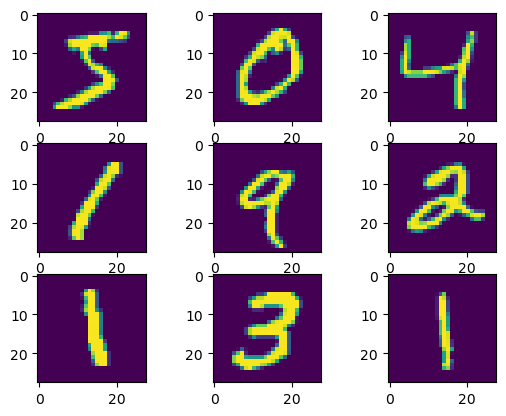

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#exploring the data
print('Training X:',x_train.shape,'Training y:',y_train.shape)
print('Testing X:',x_test.shape,'Testing y:',y_test.shape)

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(x_train[cnt])
         cnt += 1

## Frequency Distribution of values in variables

In [35]:
print("Distribution of digits in training set")
for i in range(0,10):
    print(i,'-->',np.count_nonzero(y_train==i))
print("Distribution of digits in testing set")
for i in range(0,10):
    print(i,'-->',np.count_nonzero(y_test==i))

Distribution of digits in training set
0 --> 5923
1 --> 6742
2 --> 5958
3 --> 6131
4 --> 5842
5 --> 5421
6 --> 5918
7 --> 6265
8 --> 5851
9 --> 5949
Distribution of digits in testing set
0 --> 980
1 --> 1135
2 --> 1032
3 --> 1010
4 --> 982
5 --> 892
6 --> 958
7 --> 1028
8 --> 974
9 --> 1009


## Preprocessing the images

In [36]:
# pre-process the images

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# reshape the dimensions of images to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Creating the Model

In [37]:
# build model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

#to prevent overfitting
model.add(Dropout(0.25))

#classification
model.add(Dense(10, activation="softmax"))


print("Model summary")
model.summary()

Model summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600

In [38]:
# compile model
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
# earlystopping
es = EarlyStopping(monitor="val_accuracy",
                   min_delta=0.01, patience=19, verbose=1)


# model check point
mc = ModelCheckpoint("mybestmodel.h5", monitor="val_accuracy",
                     verbose=1, save_best_only=True)


# callbacks
cb = [es, mc]

## Model Training

In [39]:
his = model.fit(x_train, y_train, epochs=20,validation_split=0.3, callbacks=cb)
model.save("mybestmodel.h5")

Epoch 1/20
1313/1313 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9339
Epoch 1: val_accuracy improved from -inf to 0.97450, saving model to mybestmodel.h5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2173 - accuracy: 0.9339 - val_loss: 0.0831 - val_accuracy: 0.9745
Epoch 2/20
1310/1313 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9760
Epoch 2: val_accuracy improved from 0.97450 to 0.97617, saving model to mybestmodel.h5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0757 - accuracy: 0.9761 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 3/20
1309/1313 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9823
Epoch 3: val_accuracy improved from 0.97617 to 0.98517, saving model to mybestmodel.h5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 4/20
1309/1313 [=====================

### Model Evaluation

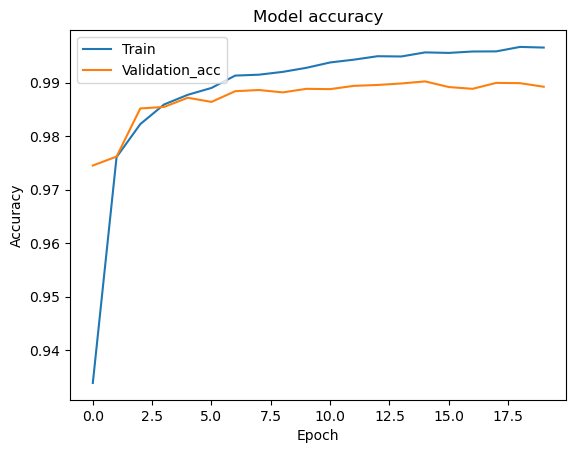

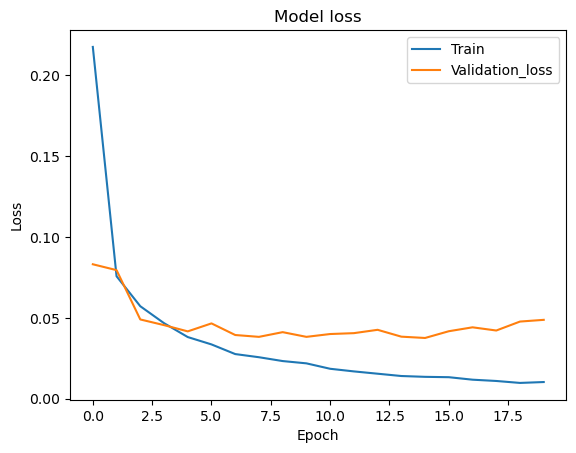

In [40]:
# Plot accuracy
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation_acc"], loc="upper left")
plt.show()

# Plot loss
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation_loss"], loc="upper right")
plt.show()

In [41]:
# evaluate model
model=keras.models.load_model("mybestmodel.h5")
score = model.evaluate(x_test, y_test)
print(f"The model loss is {score[0]}")
print(f"The model accuracy is {score[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9903
The model loss is 0.04251031205058098
The model accuracy is 0.9902999997138977


## Confusion Matrix and Classification Report

In [44]:
from sklearn import metrics
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

cr= metrics.classification_report(y_test, y_pred)
print(cr)

313/313 [==============================] - 1s 3ms/step
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   3    3 1020    0    1    0    0    4    1    0]
 [   0    0    2 1005    0    1    0    1    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   2    0    0    7    0  878    2    1    1    1]
 [   4    3    0    0    4    2  944    0    1    0]
 [   0    3    6    2    0    0    0 1017    0    0]
 [   4    0    1    2    0    1    1    2  962    1]
 [   1    3    0    4    7    3    0    3    2  986]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99  